<a href="https://colab.research.google.com/github/krishnauttej/Digit-Recognisation/blob/master/Digit_Recognisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools


from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,AveragePooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau,EarlyStopping


sns.set(style='white', context='notebook', palette='deep')

In [0]:
# import warnings
# warnings.filterwarnings('ignore')

In [0]:

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:

Y_train = train["label"]
print(Y_train.shape)



X_train = train.drop(labels = ["label"],axis = 1) 
print(X_train.shape)









(4011,)
(4011, 784)


In [0]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [5]:

X_train.isnull().any().describe()

count       784
unique        2
top       False
freq        624
dtype: object

In [6]:
test.isnull().any().describe()

count       784
unique        2
top       False
freq        415
dtype: object

In [0]:

X_train = X_train / 255.0
test = test / 255.0

In [0]:

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)


In [6]:


Y_train = to_categorical(Y_train, num_classes = 10)

Y_train.shape

(4011, 10)

In [0]:

random_seed = 2


X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=random_seed)

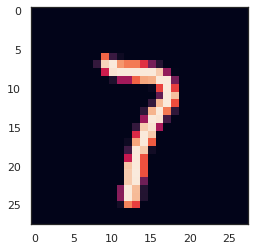

In [8]:
plt.imshow(X_train[0][:,:,0])

In [45]:
model = Sequential()

# C1 Convolutional Layer
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1), padding="same"))

# S2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# S4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())

# FC6 Fully Connected Layer
model.add(Dense(84, activation='relu'))

#Output Layer with softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_9 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_10 (Averag (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten_5 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 84)               

In [0]:

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.1)

In [0]:
early=EarlyStopping(patience=5)


In [0]:

epochs = 30


batch_size = 86

In [0]:

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,    
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  


datagen.fit(X_train)

In [33]:

history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

Epoch 1/30
 - 1s - loss: 2.2893 - accuracy: 0.1842 - val_loss: 2.2588 - val_accuracy: 0.3225
Epoch 2/30
 - 1s - loss: 2.2509 - accuracy: 0.2828 - val_loss: 2.1717 - val_accuracy: 0.4147
Epoch 3/30
 - 1s - loss: 2.1294 - accuracy: 0.3430 - val_loss: 1.8009 - val_accuracy: 0.6177
Epoch 4/30
 - 1s - loss: 1.7439 - accuracy: 0.4542 - val_loss: 1.2134 - val_accuracy: 0.6289
Epoch 5/30
 - 1s - loss: 1.4692 - accuracy: 0.5204 - val_loss: 0.9023 - val_accuracy: 0.7024
Epoch 6/30
 - 1s - loss: 1.3387 - accuracy: 0.5552 - val_loss: 0.7446 - val_accuracy: 0.7846
Epoch 7/30
 - 1s - loss: 1.2183 - accuracy: 0.6022 - val_loss: 0.6714 - val_accuracy: 0.7995
Epoch 8/30
 - 1s - loss: 1.0942 - accuracy: 0.6395 - val_loss: 0.5592 - val_accuracy: 0.8493
Epoch 9/30
 - 1s - loss: 0.9654 - accuracy: 0.6937 - val_loss: 0.5401 - val_accuracy: 0.8593
Epoch 10/30
 - 1s - loss: 0.8678 - accuracy: 0.7309 - val_loss: 0.5137 - val_accuracy: 0.8468
Epoch 11/30
 - 1s - loss: 0.8268 - accuracy: 0.7434 - val_loss: 0.426

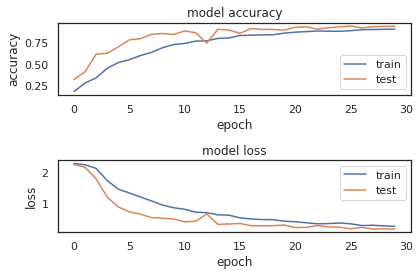

In [43]:

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()


In [0]:

results = model.predict(test)


results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)


submission.to_csv("digit.csv",index=False)